# Join data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
course_info_df = pd.read_csv('course_info.csv')
course_df = pd.read_json('course.json',lines=True)

In [3]:
course_df = course_df.drop(columns=['prerequisites','field','about'])
course_df

,id,name,resource
0,C_584313,《资治通鉴》导读,"[{'titles': ['第一课 导论与三家分晋', '导论', '导论'], 'reso..."
1,C_584329,微积分——极限理论与一元函数,"[{'titles': ['序言', '序言', '序言'], 'resource_id':..."
2,C_584381,新闻摄影,"[{'titles': ['第一章 绪论', '第一讲 引言1', '引言1'], 'res..."
3,C_597208,数据挖掘：理论与算法,"[{'titles': ['走进数据科学：博大精深，美不胜收', '整装待发', 'Vide..."
4,C_597225,大学计算机,"[{'titles': ['第1周： 基于计算机的问题求解', '课程介绍', '开篇'],..."
...,...,...,...
3776,C_2338076,（疾风计划）软件工程,"[{'titles': ['第1章 初识软件工程 ', '1.1 软件无处不在 ', '讲课..."
3777,C_2341259,（疾风计划）面向对象程序设计（C++）,"[{'titles': ['第一讲 课程简介与编程环境', '1.0 课程定位、教学内容',..."
3778,C_2337996,（疾风计划）数据结构(下),"[{'titles': ['第零章 ', '选课之前', '宣传片'], 'resourc..."
3779,C_1945689,机器学习训练营,"[{'titles': ['序-开营仪式及学习课件', None, '1.1_初识机器学习'..."


In [4]:
course_info_df

,course_id,total_comments,average_completion_rate,negative,positive,neutral,num_users
0,C_1017355,1574.0,0.707347,6.0,74.0,1494.0,9341
1,C_1017419,102.0,0.791323,0.0,5.0,97.0,534
2,C_1025064,227.0,0.869692,1.0,17.0,209.0,2521
3,C_1025076,1.0,0.507126,0.0,1.0,0.0,371
4,C_1025079,38.0,0.676190,6.0,10.0,22.0,1159
...,...,...,...,...,...,...,...
3776,C_955163,0.0,NaN,0.0,0.0,0.0,17782
3777,C_956128,0.0,NaN,0.0,0.0,0.0,1088
3778,C_956129,171.0,NaN,8.0,3.0,160.0,1025
3779,C_956130,1.0,0.700565,0.0,1.0,0.0,2581


In [5]:
course_info_df = course_info_df.set_index('course_id')
course_df = course_df.set_index('id')
df = course_df.join(course_info_df)

In [6]:
df['resource'] = df['resource'].apply(lambda x: len(x))
df

,name,resource,total_comments,average_completion_rate,negative,positive,neutral,num_users
id,,,,,,,,
C_584313,《资治通鉴》导读,91,0.0,NaN,0.0,0.0,0.0,3
C_584329,微积分——极限理论与一元函数,170,0.0,NaN,0.0,0.0,0.0,6
C_584381,新闻摄影,127,0.0,NaN,0.0,0.0,0.0,5
C_597208,数据挖掘：理论与算法,125,0.0,NaN,0.0,0.0,0.0,10
C_597225,大学计算机,165,0.0,NaN,0.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...
C_2338076,（疾风计划）软件工程,103,0.0,NaN,0.0,0.0,0.0,1
C_2341259,（疾风计划）面向对象程序设计（C++）,76,0.0,NaN,0.0,0.0,0.0,1
C_2337996,（疾风计划）数据结构(下),324,0.0,NaN,0.0,0.0,0.0,1


In [7]:
df.to_csv('course_info_joined.csv')

In [8]:
df.describe()

,resource,total_comments,average_completion_rate,negative,positive,neutral,num_users
count,3781.000000,3781.000000,1291.000000,3781.000000,3781.000000,3781.000000,3781.000000
mean,71.685533,81.877017,0.654256,0.856123,25.730495,55.290399,3047.637926
std,74.802345,1243.773395,0.216892,10.549151,927.666301,563.215217,7887.464980
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,38.000000,0.000000,0.560921,0.000000,0.000000,0.000000,27.000000
50%,59.000000,0.000000,0.690236,0.000000,0.000000,0.000000,581.000000
75%,88.000000,1.000000,0.800112,0.000000,0.000000,0.000000,2992.000000
max,2728.000000,67738.000000,1.000000,583.000000,56758.000000,13122.000000,231674.000000


# Label

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [10]:
file_path = 'course_info_joined.csv'
df = pd.read_csv(file_path)

In [11]:
df

,id,name,resource,total_comments,average_completion_rate,negative,positive,neutral,num_users
0,C_584313,《资治通鉴》导读,91,0.0,NaN,0.0,0.0,0.0,3
1,C_584329,微积分——极限理论与一元函数,170,0.0,NaN,0.0,0.0,0.0,6
2,C_584381,新闻摄影,127,0.0,NaN,0.0,0.0,0.0,5
3,C_597208,数据挖掘：理论与算法,125,0.0,NaN,0.0,0.0,0.0,10
4,C_597225,大学计算机,165,0.0,NaN,0.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...
3776,C_2338076,（疾风计划）软件工程,103,0.0,NaN,0.0,0.0,0.0,1
3777,C_2341259,（疾风计划）面向对象程序设计（C++）,76,0.0,NaN,0.0,0.0,0.0,1
3778,C_2337996,（疾风计划）数据结构(下),324,0.0,NaN,0.0,0.0,0.0,1
3779,C_1945689,机器学习训练营,76,20.0,0.85056,2.0,0.0,18.0,184


Processing

In [12]:
higher_30 = df[df['num_users'] >= 30].count()[0]

lower_30 = df[df['num_users'] < 30].count()[0]

# Labels cho biểu đồ tròn
labels = ['>30', '<30']

# Giá trị cho biểu đồ tròn
sizes = [higher_30, lower_30]

# Màu sắc cho các phần tử
colors = ['lightcoral', 'lightskyblue']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Tỉ lệ khóa học có ít hơn 30 học viên')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

/tmp/ipykernel_190391/1865831706.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  higher_30 = df[df['num_users'] >= 30].count()[0]
/tmp/ipykernel_190391/1865831706.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lower_30 = df[df['num_users'] < 30].count()[0]


NameError: name 'plt' is not defined

In [ ]:
# drop course with low user
significant_num_users = 30
dropped_df = df.loc[df['num_users'] < significant_num_users]
df = df.drop(df.loc[df['num_users'] < significant_num_users].index)

In [ ]:
dropped_df

,id,name,resource,total_comments,average_completion_rate,negative,positive,neutral,num_users
0,C_584313,《资治通鉴》导读,91,0.0,NaN,0.0,0.0,0.0,3
1,C_584329,微积分——极限理论与一元函数,170,0.0,NaN,0.0,0.0,0.0,6
2,C_584381,新闻摄影,127,0.0,NaN,0.0,0.0,0.0,5
3,C_597208,数据挖掘：理论与算法,125,0.0,NaN,0.0,0.0,0.0,10
4,C_597225,大学计算机,165,0.0,NaN,0.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...
3775,C_2338005,（疾风计划）算法设计与分析,74,0.0,NaN,0.0,0.0,0.0,1
3776,C_2338076,（疾风计划）软件工程,103,0.0,NaN,0.0,0.0,0.0,1
3777,C_2341259,（疾风计划）面向对象程序设计（C++）,76,0.0,NaN,0.0,0.0,0.0,1
3778,C_2337996,（疾风计划）数据结构(下),324,0.0,NaN,0.0,0.0,0.0,1


In [ ]:
df.isnull().sum()

id                            0
name                          0
resource                      0
total_comments                0
average_completion_rate    1598
negative                      0
positive                      0
neutral                       0
num_users                     0
dtype: int64

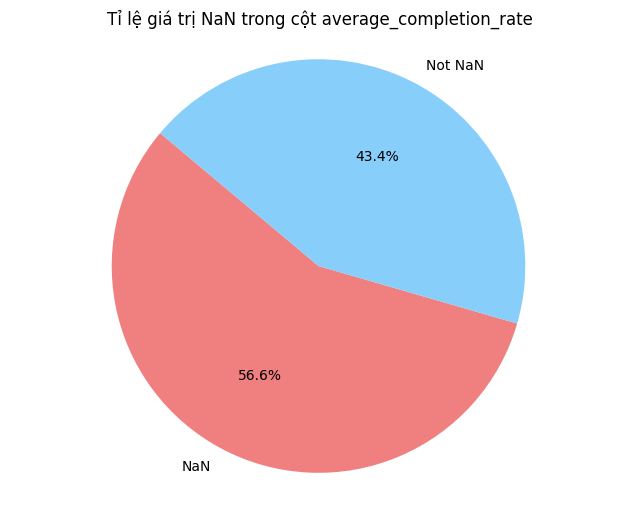

In [ ]:
nan_count = df['average_completion_rate'].isnull().sum()

# Đếm số lượng giá trị không NaN trong cột 'average_completion_rate'
not_nan_count = df['average_completion_rate'].notnull().sum()

# Labels cho biểu đồ tròn
labels = ['NaN', 'Not NaN']

# Giá trị cho biểu đồ tròn
sizes = [nan_count, not_nan_count]

# Màu sắc cho các phần tử
colors = ['lightcoral', 'lightskyblue']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Tỉ lệ giá trị NaN trong cột average_completion_rate')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

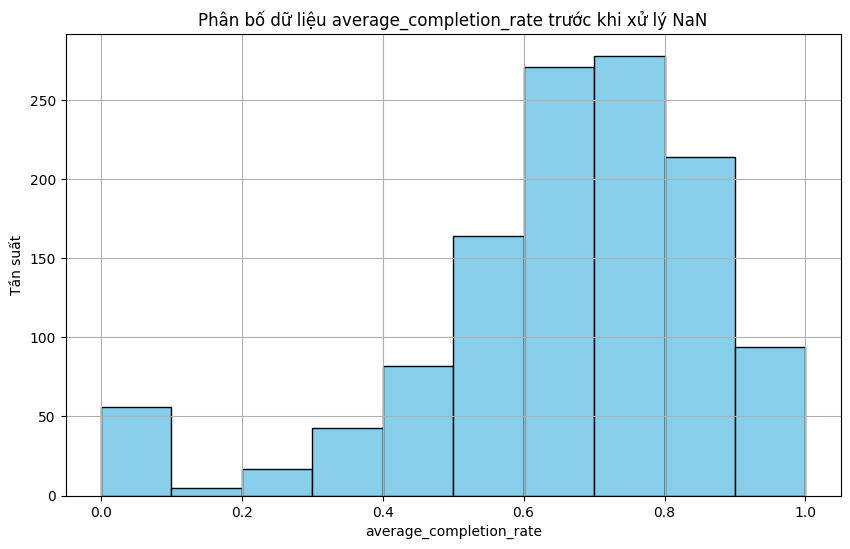

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['average_completion_rate'], bins=10, color='skyblue', edgecolor='black')
plt.title('Phân bố dữ liệu average_completion_rate trước khi xử lý NaN')
plt.xlabel('average_completion_rate')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

In [ ]:
# Handle missing average completion rates and comments by filling with 0
df['average_completion_rate'] = df['average_completion_rate'].fillna(df['average_completion_rate'].mean())
df[['positive', 'negative', 'neutral', 'total_comments']] = df[['positive', 'negative', 'neutral', 'total_comments']].fillna(0)

In [ ]:
# Avoid division by zero for total comments
df['total_comments'] = df['total_comments'].replace(0, 1)

In [ ]:
# Good and Bad Comment Ratios
df['good_comment_ratio'] = df['positive'] / df['total_comments']
df['bad_comment_ratio'] = df['negative'] / df['total_comments']

In [ ]:
# Normalize num_users and average_completion_rate
scaler = MinMaxScaler()
df[['num_users_normalized', 'average_completion_rate_normalized', 'resource_normalized']] = scaler.fit_transform(df[['num_users', 'average_completion_rate','resource']])

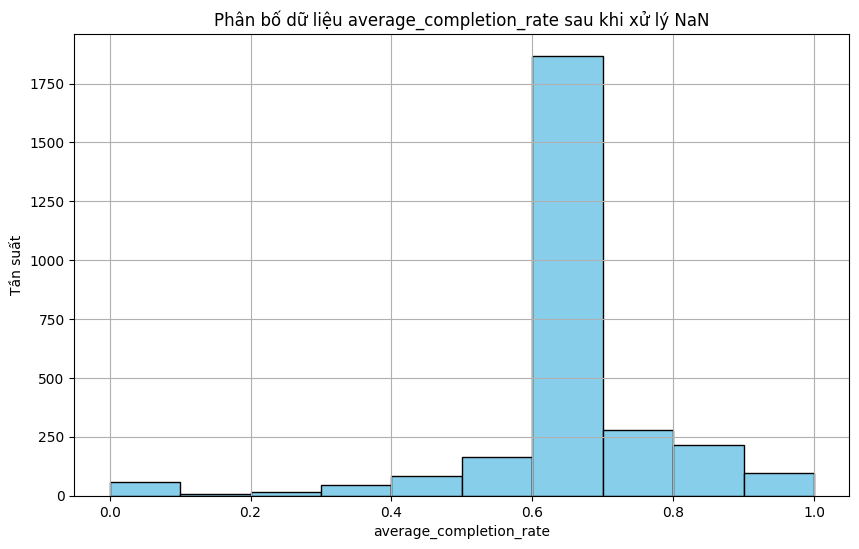

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['average_completion_rate'], bins=10, color='skyblue', edgecolor='black')
plt.title('Phân bố dữ liệu average_completion_rate sau khi xử lý NaN')
plt.xlabel('average_completion_rate')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

In [ ]:
df.drop(['good_comment_ratio','bad_comment_ratio','num_users_normalized','average_completion_rate_normalized','resource_normalized'],axis=1).describe()

,resource,total_comments,average_completion_rate,negative,positive,neutral,num_users
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000
mean,76.184266,110.330617,0.655651,1.145641,34.473777,74.078313,4081.430191
std,79.481241,1438.636410,0.140608,12.197668,1073.691098,650.888096,8896.404229
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,42.000000,1.000000,0.655651,0.000000,0.000000,0.000000,299.500000
50%,63.000000,1.000000,0.655651,0.000000,0.000000,0.000000,1484.500000
75%,91.000000,3.000000,0.662695,0.000000,1.000000,1.000000,4496.000000
max,2728.000000,67738.000000,1.000000,583.000000,56758.000000,13122.000000,231674.000000


Weights

In [ ]:
# Weights
w1, w2, w3, w4, w5 = 0.2, 0.2, 0.2, 0.2, 0.2

# Composite Score
df['composite_score'] = (
    w1 * df['num_users_normalized'] +
    w2 * df['average_completion_rate_normalized'] +
    w3 * df['good_comment_ratio'] -
    w4 * df['bad_comment_ratio'] +
    w5 * df['resource_normalized']
)

In [ ]:
# Define thresholds for bad, normal, and good courses 
quantiles = df['composite_score'].quantile([0.33, 0.67])
df['course_classification'] = pd.cut(df['composite_score'], bins=[-float('inf'), quantiles[0.33], quantiles[0.67], float('inf')], labels=['bad', 'normal', 'good'])

In [ ]:
df[['id', 'name', 'composite_score', 'course_classification']]

,id,name,composite_score,course_classification
22,C_655852,系列课-已结课无回顾时长,0.145157,normal
23,C_655850,系列课-开课未开始,0.006615,bad
24,C_654554,系列课-开课中,0.138332,normal
25,C_654506,系列课-开课已结束有回顾时长,0.131291,bad
26,C_629558,医学免疫学与病原生物学,0.137746,normal
...,...,...,...,...
3758,C_2342518,客户关系管理,0.173033,good
3759,C_2342532,Fundamentals of Circuit Analysis,0.162173,good
3760,C_2343056,运动训练基本原理与方法,0.128885,bad
3763,C_2343522,高等飞行动力学,0.134176,bad


In [ ]:
df['course_classification'].value_counts()

course_classification
normal    960
bad       931
good      931
Name: count, dtype: int64

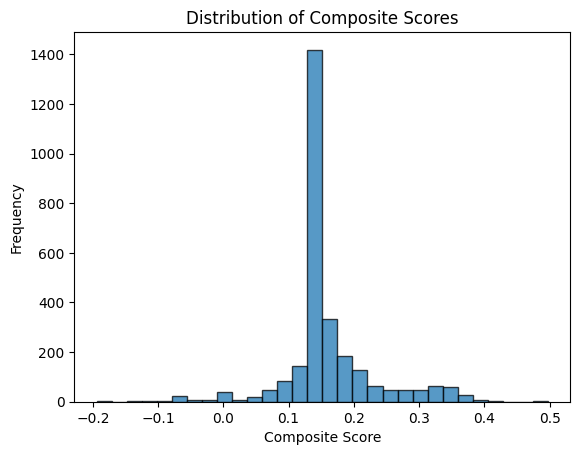

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of composite scores
plt.hist(df['composite_score'], bins=30, alpha=0.75, edgecolor='black')
plt.title('Distribution of Composite Scores')
plt.xlabel('Composite Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df[df['course_classification'] == 'normal'].describe()

,resource,total_comments,average_completion_rate,negative,positive,neutral,num_users,good_comment_ratio,bad_comment_ratio,num_users_normalized,average_completion_rate_normalized,resource_normalized,composite_score
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,85.354167,40.657292,0.662722,0.304167,1.389583,38.090625,4742.508333,0.008154,0.006086,0.020344,0.662722,0.030933,0.143213
std,43.261404,461.908432,0.023865,2.592840,19.010680,443.069788,4864.414066,0.045027,0.040616,0.021000,0.023865,0.015864,0.005093
min,1.000000,1.000000,0.471338,0.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000017,0.471338,0.000000,0.136657
25%,57.000000,1.000000,0.655651,0.000000,0.000000,0.000000,1222.750000,0.000000,0.000000,0.005149,0.655651,0.020535,0.138929
50%,76.000000,1.000000,0.655651,0.000000,0.000000,0.000000,3084.500000,0.000000,0.000000,0.013186,0.655651,0.027503,0.141928
75%,105.000000,1.000000,0.655651,0.000000,0.000000,0.000000,6632.000000,0.000000,0.000000,0.028501,0.655651,0.038137,0.146771
max,322.000000,12784.000000,0.865568,66.000000,563.000000,12200.000000,24221.000000,0.500000,0.500000,0.104432,0.865568,0.117712,0.155638


In [ ]:
df[df['num_users'] == 30]

,id,name,resource,total_comments,average_completion_rate,negative,positive,neutral,num_users,good_comment_ratio,bad_comment_ratio,num_users_normalized,average_completion_rate_normalized,resource_normalized,composite_score,course_classification
1902,C_682462,英文写作指导进阶,72,1.0,0.655651,0.0,0.0,0.0,30,0.0,0.0,0.0,0.655651,0.026036,0.136337,bad
2787,C_1875536,Energy-oriented Business Administration,66,1.0,0.833333,0.0,0.0,0.0,30,0.0,0.0,0.0,0.833333,0.023836,0.171434,good
3587,C_2302130,测量学基础,34,1.0,0.655651,0.0,0.0,0.0,30,0.0,0.0,0.0,0.655651,0.012101,0.133550,bad


In [ ]:
df

,id,name,resource,total_comments,average_completion_rate,negative,positive,neutral,num_users,good_comment_ratio,bad_comment_ratio,num_users_normalized,average_completion_rate_normalized,resource_normalized,composite_score,course_classification
22,C_655852,系列课-已结课无回顾时长,162,1.0,0.666667,0.0,0.0,0.0,48,0.0,0.0,0.000078,0.666667,0.059039,0.145157,normal
23,C_655850,系列课-开课未开始,91,1.0,0.000000,0.0,0.0,0.0,47,0.0,0.0,0.000073,0.000000,0.033003,0.006615,bad
24,C_654554,系列课-开课中,99,1.0,0.655651,0.0,0.0,0.0,47,0.0,0.0,0.000073,0.655651,0.035937,0.138332,normal
25,C_654506,系列课-开课已结束有回顾时长,3,1.0,0.655651,0.0,0.0,0.0,47,0.0,0.0,0.000073,0.655651,0.000733,0.131291,bad
26,C_629558,医学免疫学与病原生物学,91,1.0,0.655651,0.0,0.0,0.0,48,0.0,0.0,0.000078,0.655651,0.033003,0.137746,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,C_2342518,客户关系管理,78,1.0,0.835524,0.0,0.0,0.0,355,0.0,0.0,0.001403,0.835524,0.028236,0.173033,good
3759,C_2342532,Fundamentals of Circuit Analysis,204,1.0,0.736111,0.0,0.0,0.0,103,0.0,0.0,0.000315,0.736111,0.074441,0.162173,good
3760,C_2343056,运动训练基本原理与方法,26,1.0,0.635000,0.0,0.0,0.0,90,0.0,0.0,0.000259,0.635000,0.009168,0.128885,bad
3763,C_2343522,高等飞行动力学,42,1.0,0.655651,0.0,0.0,0.0,75,0.0,0.0,0.000194,0.655651,0.015035,0.134176,bad


In [ ]:
dropped_df

,id,name,resource,total_comments,average_completion_rate,negative,positive,neutral,num_users
0,C_584313,《资治通鉴》导读,91,0.0,NaN,0.0,0.0,0.0,3
1,C_584329,微积分——极限理论与一元函数,170,0.0,NaN,0.0,0.0,0.0,6
2,C_584381,新闻摄影,127,0.0,NaN,0.0,0.0,0.0,5
3,C_597208,数据挖掘：理论与算法,125,0.0,NaN,0.0,0.0,0.0,10
4,C_597225,大学计算机,165,0.0,NaN,0.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...
3775,C_2338005,（疾风计划）算法设计与分析,74,0.0,NaN,0.0,0.0,0.0,1
3776,C_2338076,（疾风计划）软件工程,103,0.0,NaN,0.0,0.0,0.0,1
3777,C_2341259,（疾风计划）面向对象程序设计（C++）,76,0.0,NaN,0.0,0.0,0.0,1
3778,C_2337996,（疾风计划）数据结构(下),324,0.0,NaN,0.0,0.0,0.0,1


In [ ]:
# df = df.set_index('id')
# dropped_df = dropped_df.set_index('id')
out_df = pd.concat([df,dropped_df],sort=False)

In [ ]:
out_df.reset_index(drop=True,inplace=True)

In [ ]:
out_df

,id,name,resource,total_comments,average_completion_rate,negative,positive,neutral,num_users,good_comment_ratio,bad_comment_ratio,num_users_normalized,average_completion_rate_normalized,resource_normalized,composite_score,course_classification
0,C_655852,系列课-已结课无回顾时长,162,1.0,0.666667,0.0,0.0,0.0,48,0.0,0.0,0.000078,0.666667,0.059039,0.145157,normal
1,C_655850,系列课-开课未开始,91,1.0,0.000000,0.0,0.0,0.0,47,0.0,0.0,0.000073,0.000000,0.033003,0.006615,bad
2,C_654554,系列课-开课中,99,1.0,0.655651,0.0,0.0,0.0,47,0.0,0.0,0.000073,0.655651,0.035937,0.138332,normal
3,C_654506,系列课-开课已结束有回顾时长,3,1.0,0.655651,0.0,0.0,0.0,47,0.0,0.0,0.000073,0.655651,0.000733,0.131291,bad
4,C_629558,医学免疫学与病原生物学,91,1.0,0.655651,0.0,0.0,0.0,48,0.0,0.0,0.000078,0.655651,0.033003,0.137746,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,C_2338005,（疾风计划）算法设计与分析,74,0.0,NaN,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3777,C_2338076,（疾风计划）软件工程,103,0.0,NaN,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3778,C_2341259,（疾风计划）面向对象程序设计（C++）,76,0.0,NaN,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3779,C_2337996,（疾风计划）数据结构(下),324,0.0,NaN,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
out_df = out_df.drop(columns=['composite_score',
                              'good_comment_ratio',
                              'bad_comment_ratio',
                              'num_users_normalized',
                              'average_completion_rate_normalized',
                              'resource_normalized'])

In [ ]:
out_df.to_csv('course_labeled_1.csv',index = False)